## Diabetes Prediction

In [100]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## below line sets the backend of matplotlib to the "inline" backend.
## It means the output of the plotting commands is displayed inline

In [2]:
%matplotlib inline

## importing the data

In [3]:
data=pd.read_csv("diabetes_prediction_dataset.csv")

In [4]:
#view top 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# view the dimensions of the dataset
data.shape

(768, 9)

## Data preprocessing

In [6]:
# view dataframe summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# view descriptive statistics 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Checking for null values

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## EDA

## Pregnancies

Text(0.5, 0, 'Pregnancies')

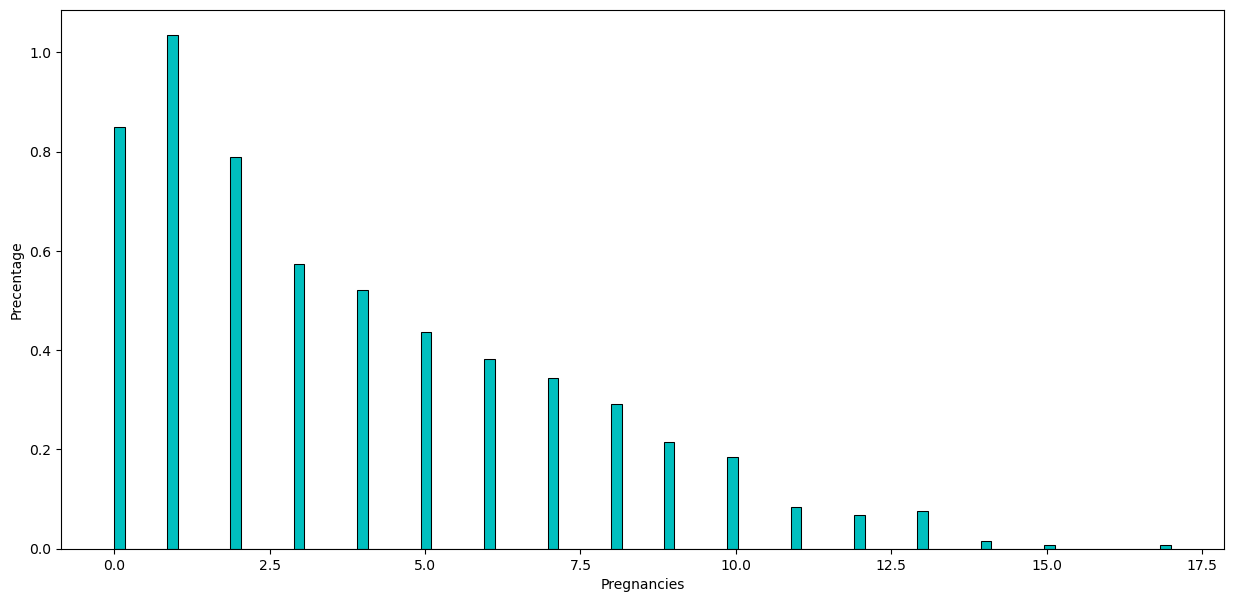

In [16]:
plt.figure(figsize=(15,7))
sns.histplot(data['Pregnancies'], facecolor='c',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('Pregnancies')

## Glucose

Text(0.5, 0, 'Glucose')

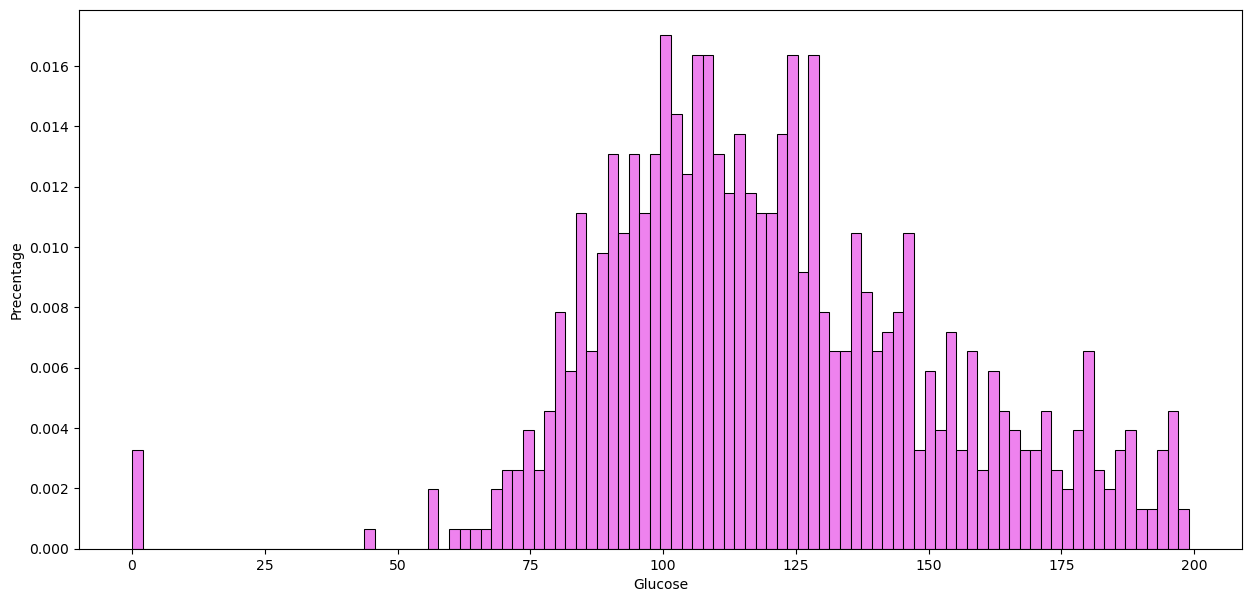

In [17]:
plt.figure(figsize=(15,7))
sns.histplot(data['Glucose'], facecolor='violet',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('Glucose')

## Blood Pressure

Text(0.5, 0, 'BloodPressure')

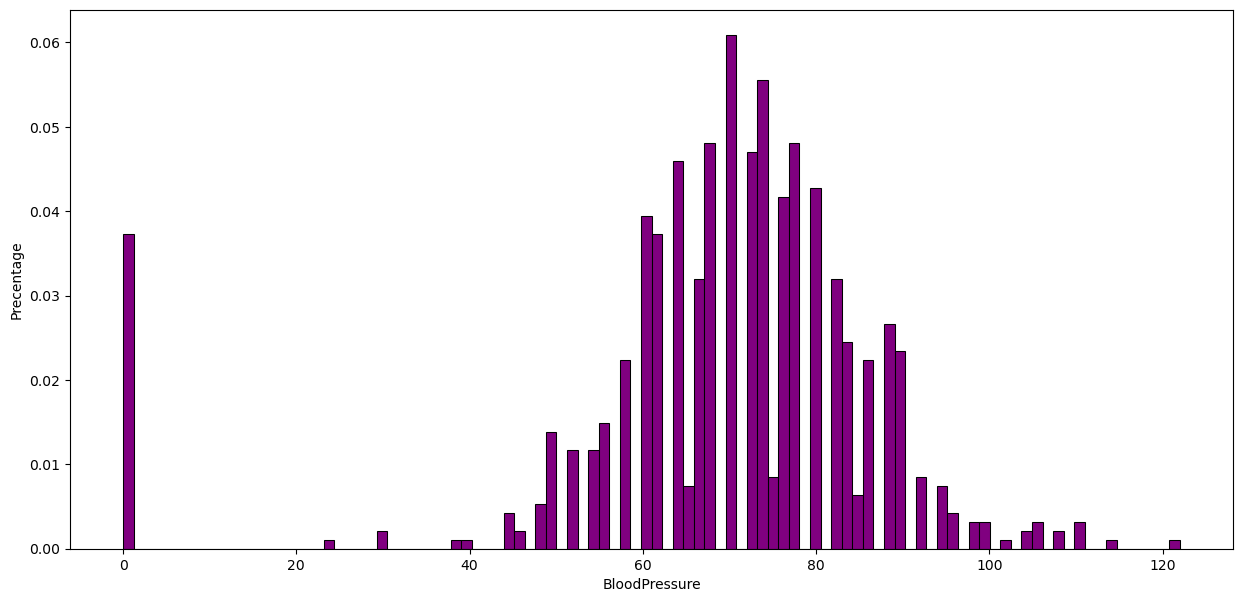

In [18]:
plt.figure(figsize=(15,7))
sns.histplot(data['BloodPressure'], facecolor='purple',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('BloodPressure')

## Skin Thickness

Text(0.5, 0, 'SkinThickness')

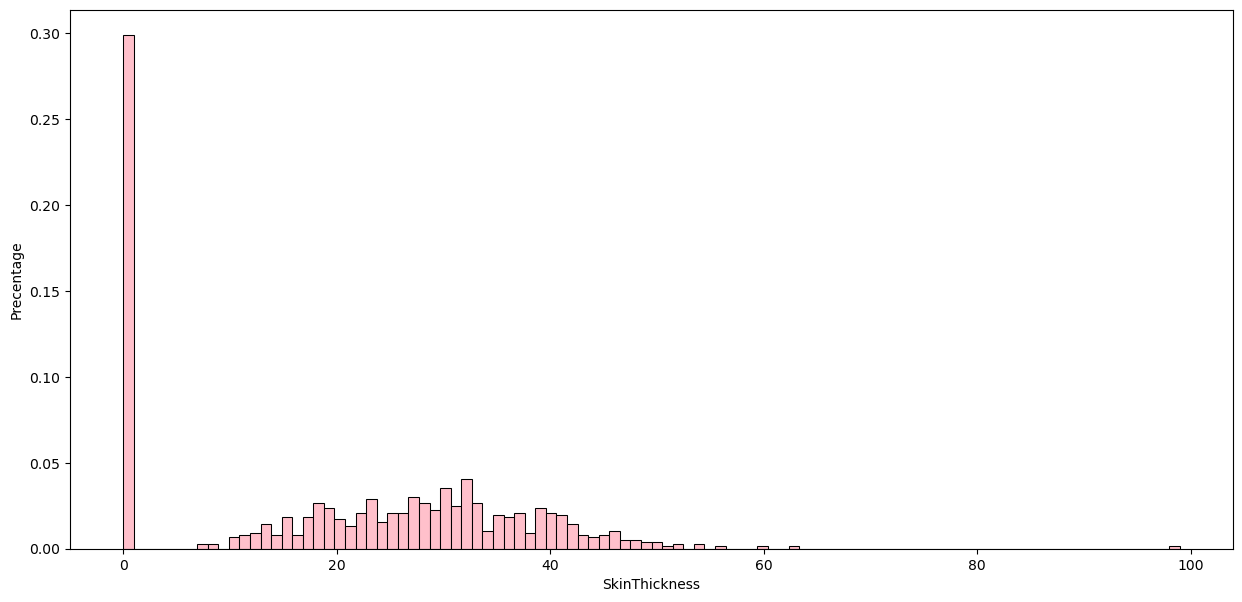

In [37]:
plt.figure(figsize=(15,7))
sns.histplot(data['SkinThickness'], facecolor='pink',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('SkinThickness')

## BMI

Text(0.5, 0, 'BMI')

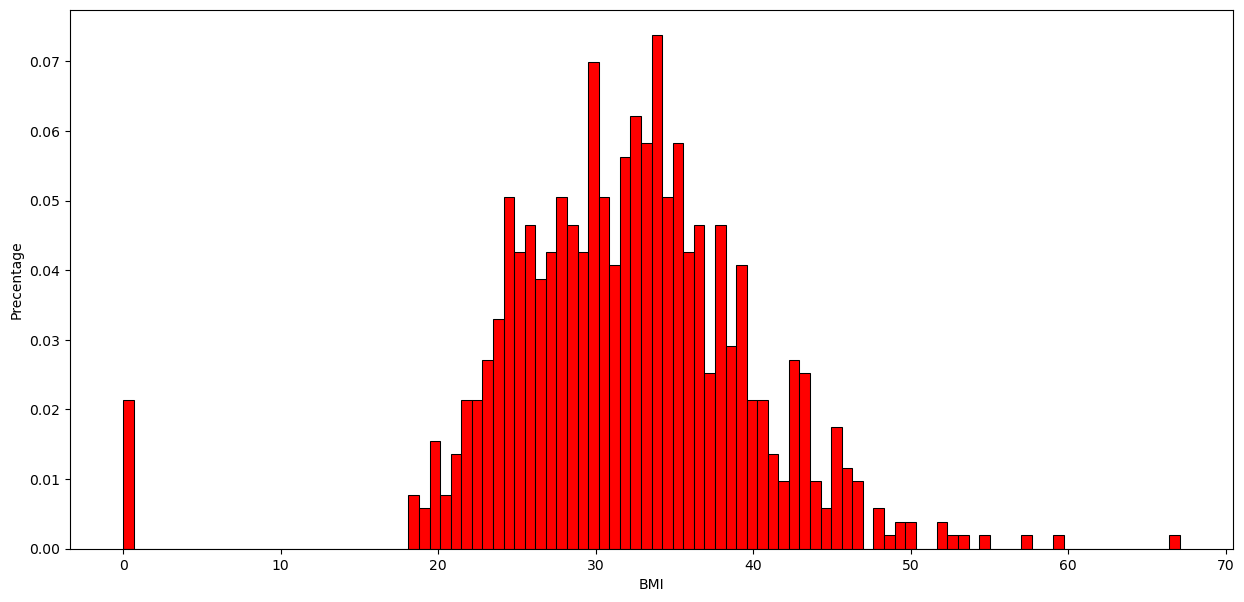

In [44]:
plt.figure(figsize=(15,7))
sns.histplot(data['BMI'], facecolor='red',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('BMI')

## Diabetes Pedigree Function

Text(0.5, 0, 'DiabetesPedigreeFunction')

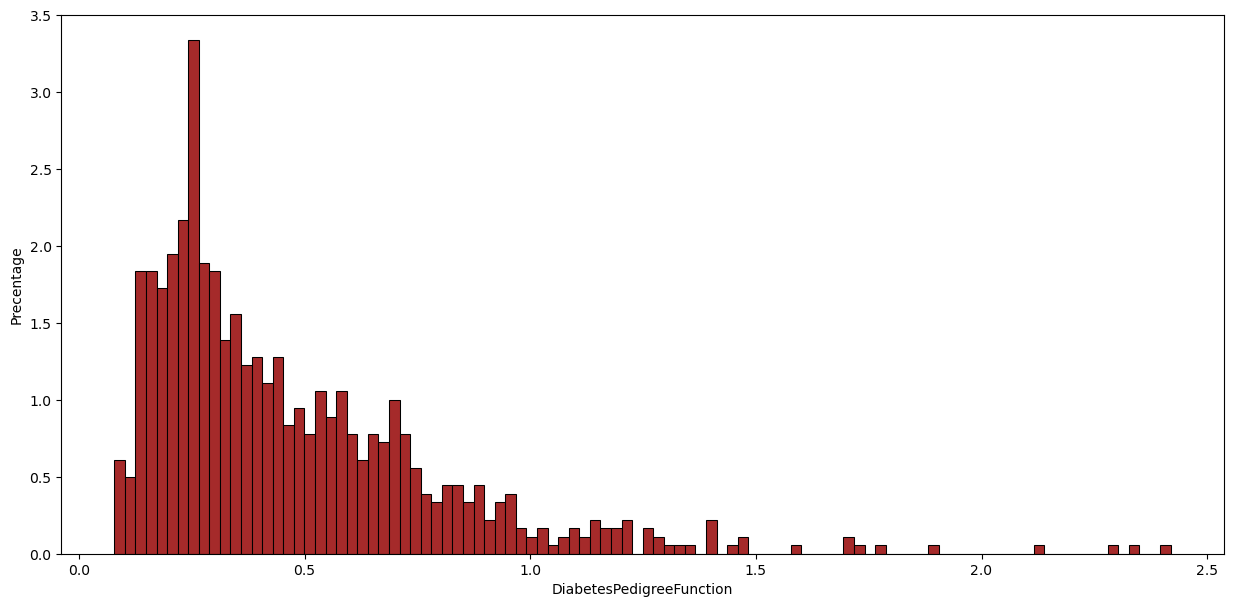

In [46]:
plt.figure(figsize=(15,7))
sns.histplot(data['DiabetesPedigreeFunction'], facecolor='brown',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('DiabetesPedigreeFunction')

## Visualization of target variables

array([<Axes: ylabel='Outcome'>], dtype=object)

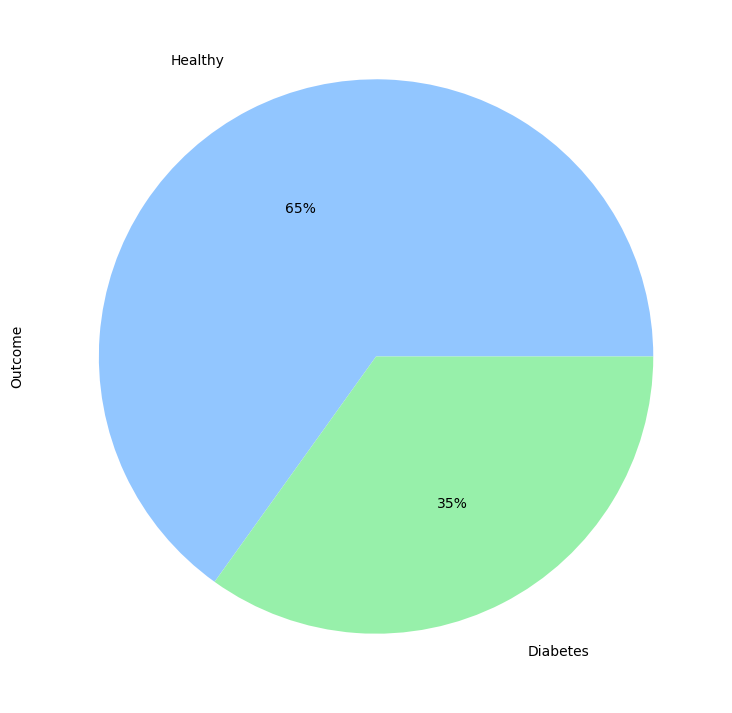

In [20]:
import matplotlib.style as style
style.available
style.use('seaborn-pastel')
labels=['Healthy','Diabetes']
data['Outcome'].value_counts().plot(kind='pie',labels=labels,subplots=True,autopct='%1.0f%%',labeldistance=1.2,figsize=(9,9))

Samples of diabetes people: 268
Samples of healthy people:  500


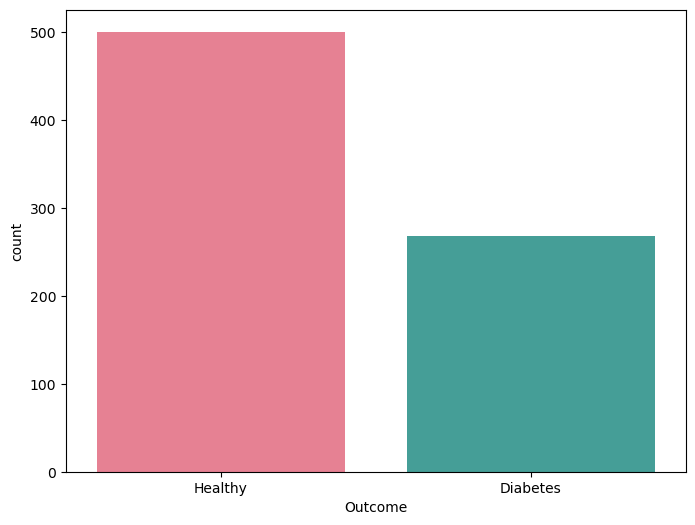

In [23]:
from matplotlib.pyplot import figure,show
figure(figsize=(8,6))
ax=sns.countplot(x=data['Outcome'],data=data,palette='husl')
ax.set_xticklabels(['Healthy','Diabetes'])
healthy,diabetes=data['Outcome'].value_counts().values
print('Samples of diabetes people:',diabetes)
print('Samples of healthy people: ',healthy)

## Distribution of other featured with respect to Outcome

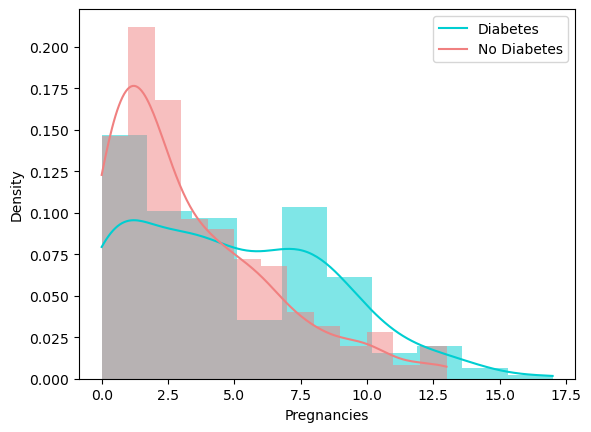

In [35]:
plt.figure()
ax=sns.histplot(data['Pregnancies'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['Pregnancies'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

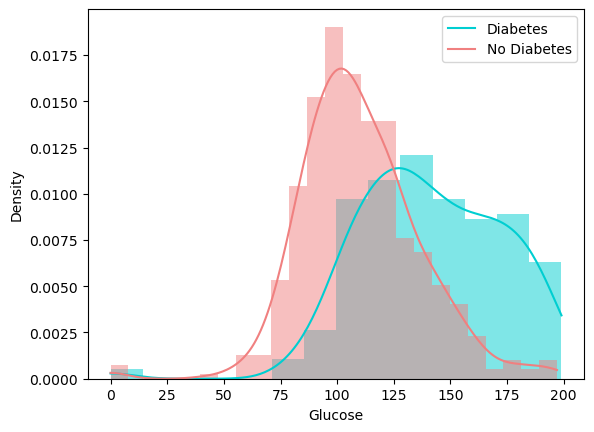

In [39]:
plt.figure()
ax=sns.histplot(data['Glucose'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['Glucose'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

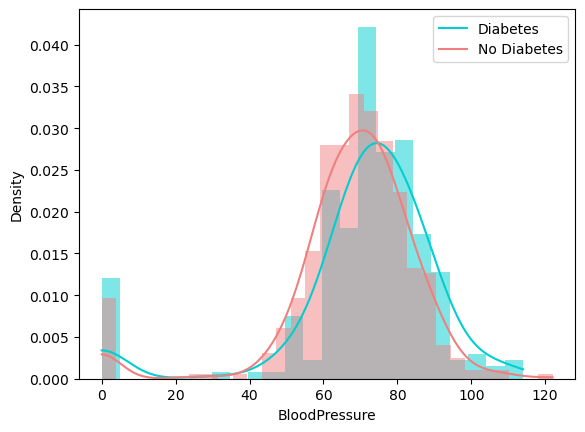

In [41]:
plt.figure()
ax=sns.histplot(data['BloodPressure'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['BloodPressure'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

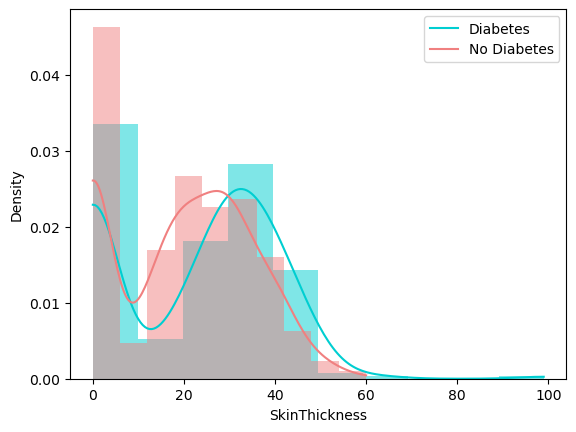

In [42]:
plt.figure()
ax=sns.histplot(data['SkinThickness'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['SkinThickness'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

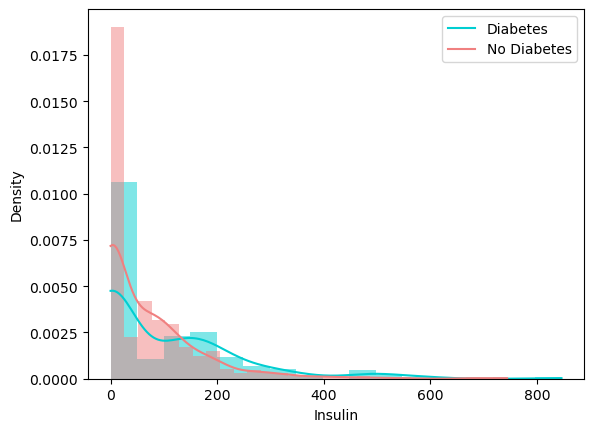

In [47]:
plt.figure()
ax=sns.histplot(data['Insulin'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['Insulin'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

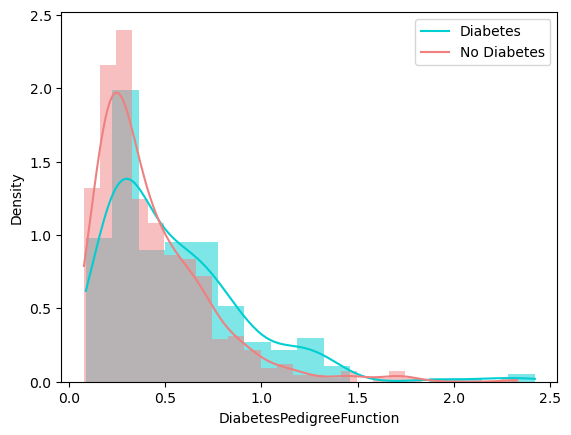

In [48]:
plt.figure()
ax=sns.histplot(data['DiabetesPedigreeFunction'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['DiabetesPedigreeFunction'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
plt.legend(['Diabetes','No Diabetes'])

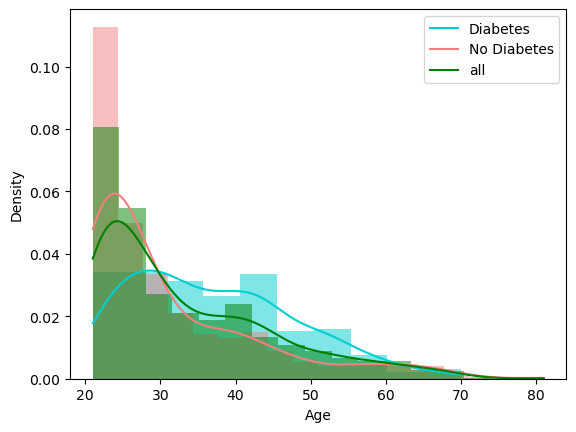

In [49]:
plt.figure()
ax=sns.histplot(data['Age'][data.Outcome==1],color='darkturquoise',kde=True,stat='density',edgecolor='none')
sns.histplot(data['Age'][data.Outcome==0],color='lightcoral',kde='True',stat='density',edgecolor='none')
sns.histplot(data['Age'],color='green',kde=True,stat='density',linewidth=0)
plt.legend(['Diabetes','No Diabetes','all'])

## pairplot

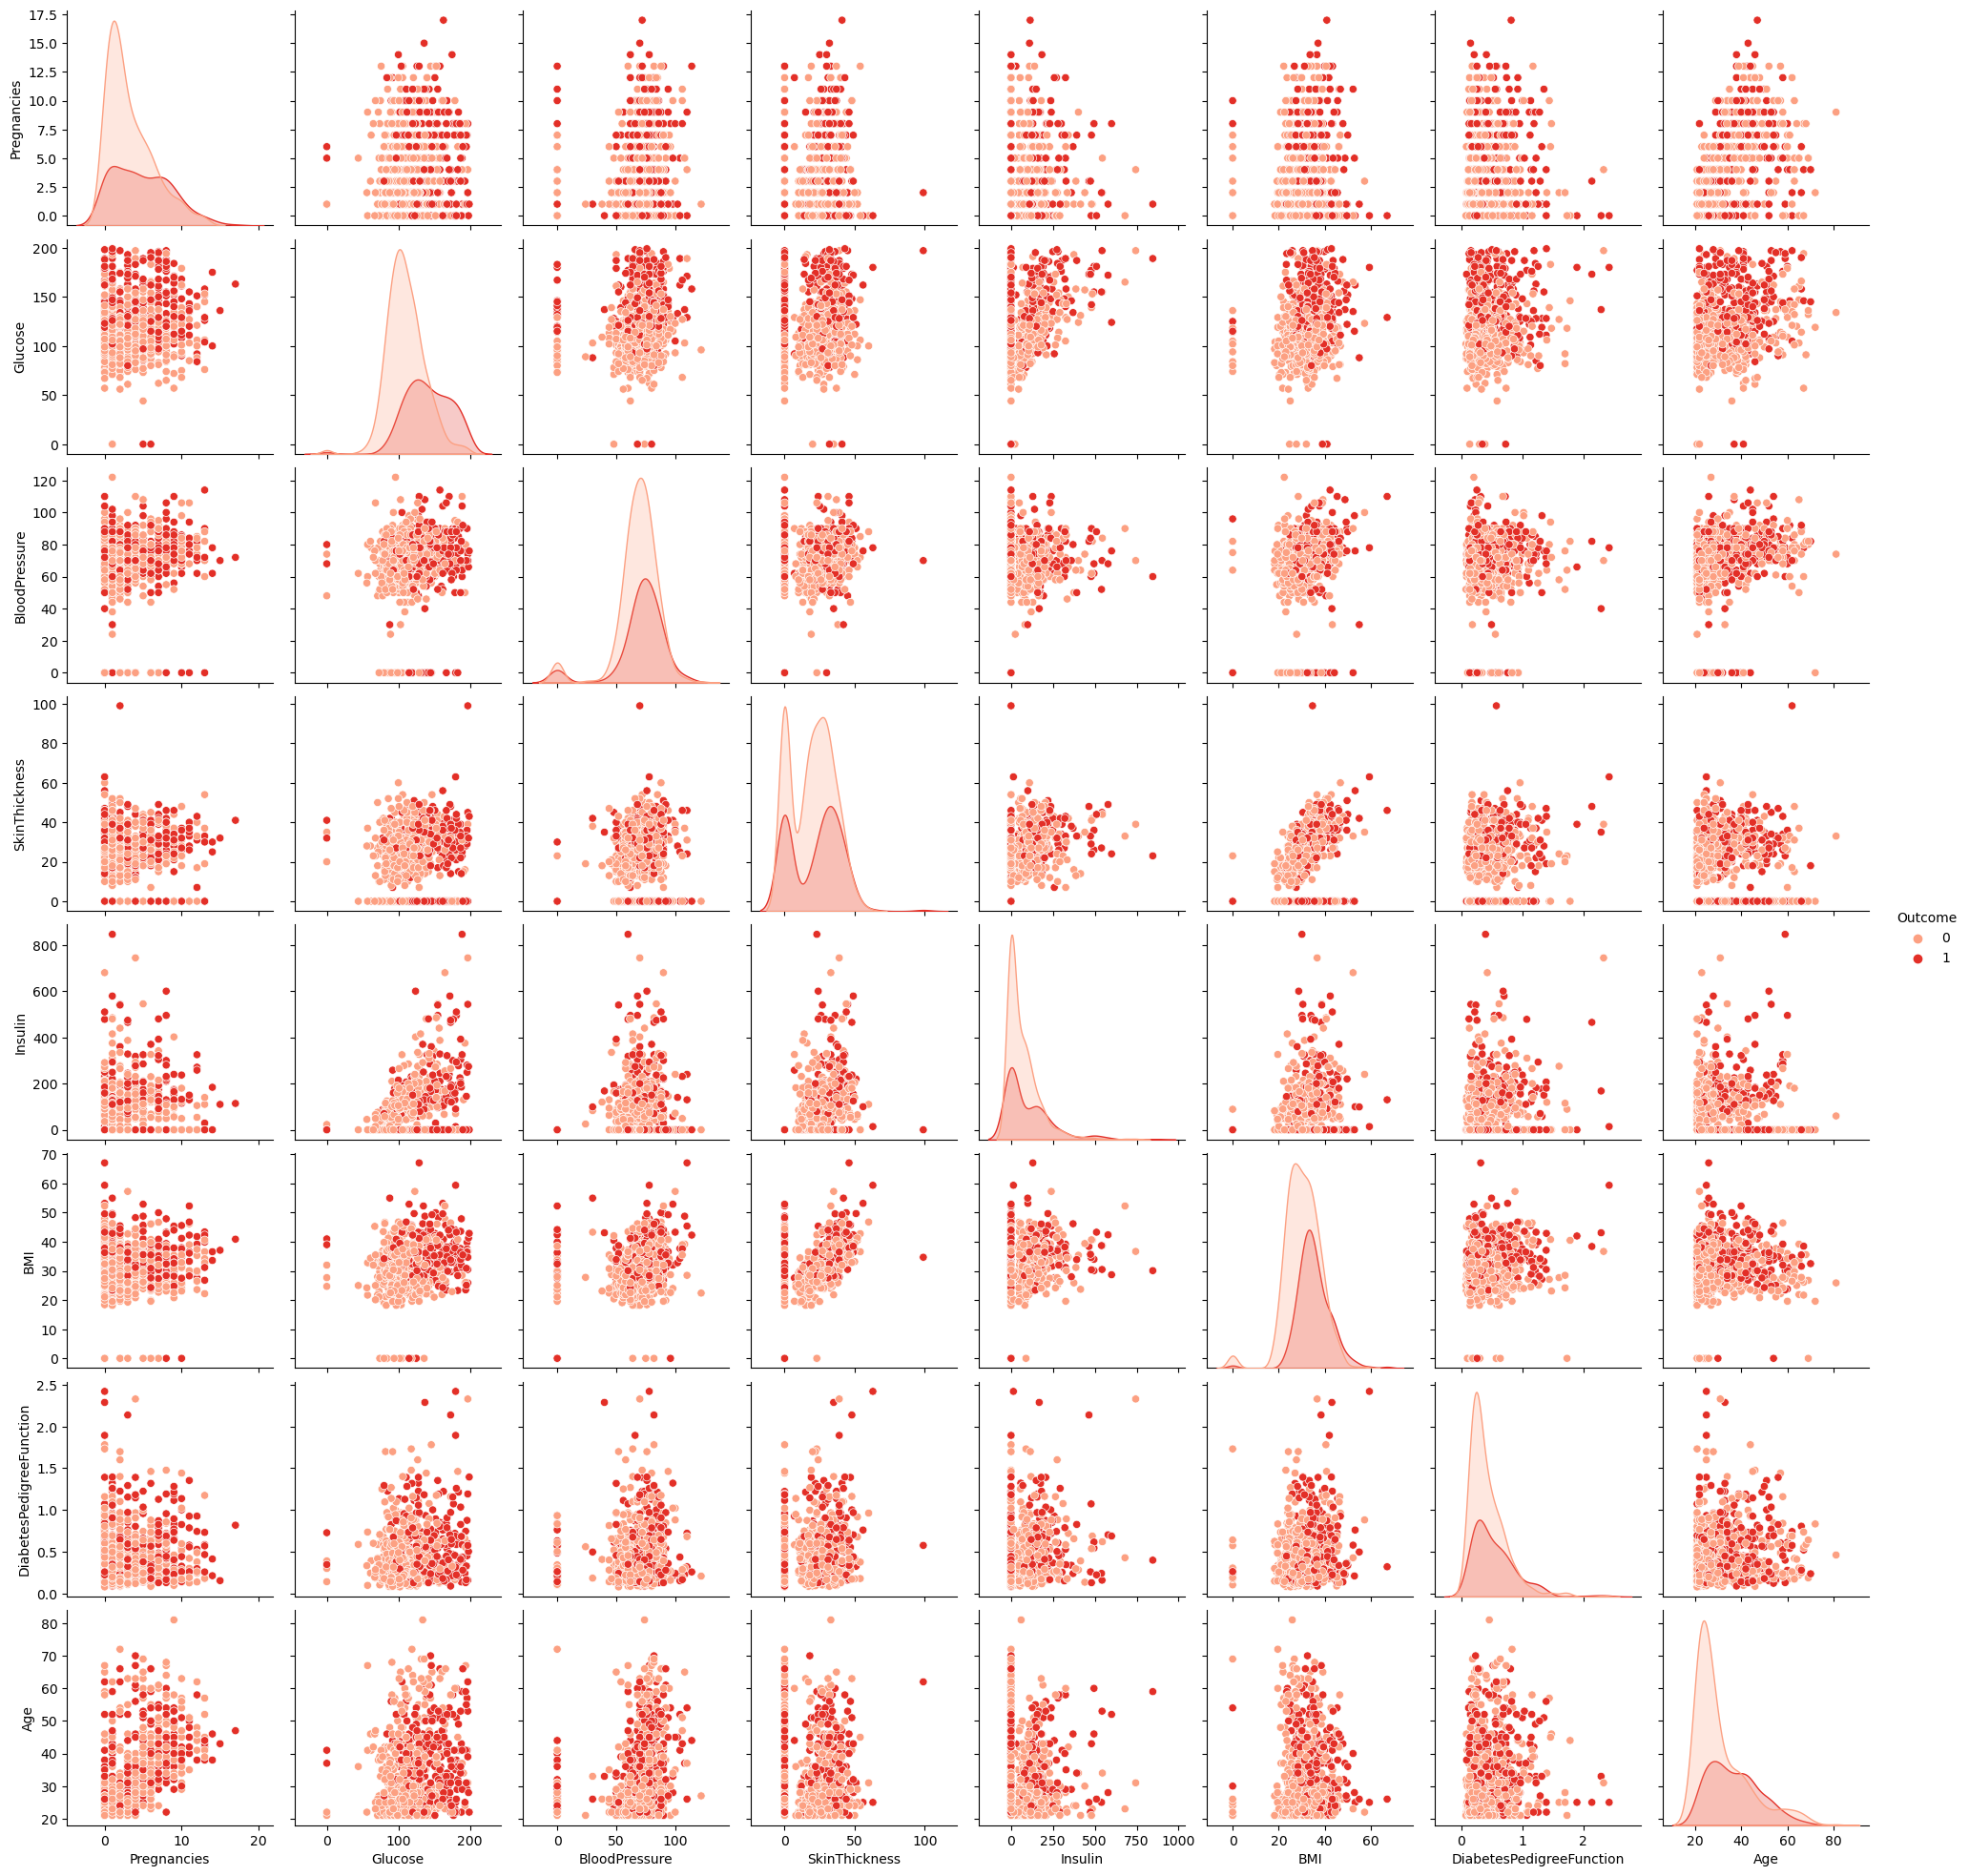

In [54]:
sns.pairplot(data,hue='Outcome',palette='Reds')

## Finding Correlation between the columns

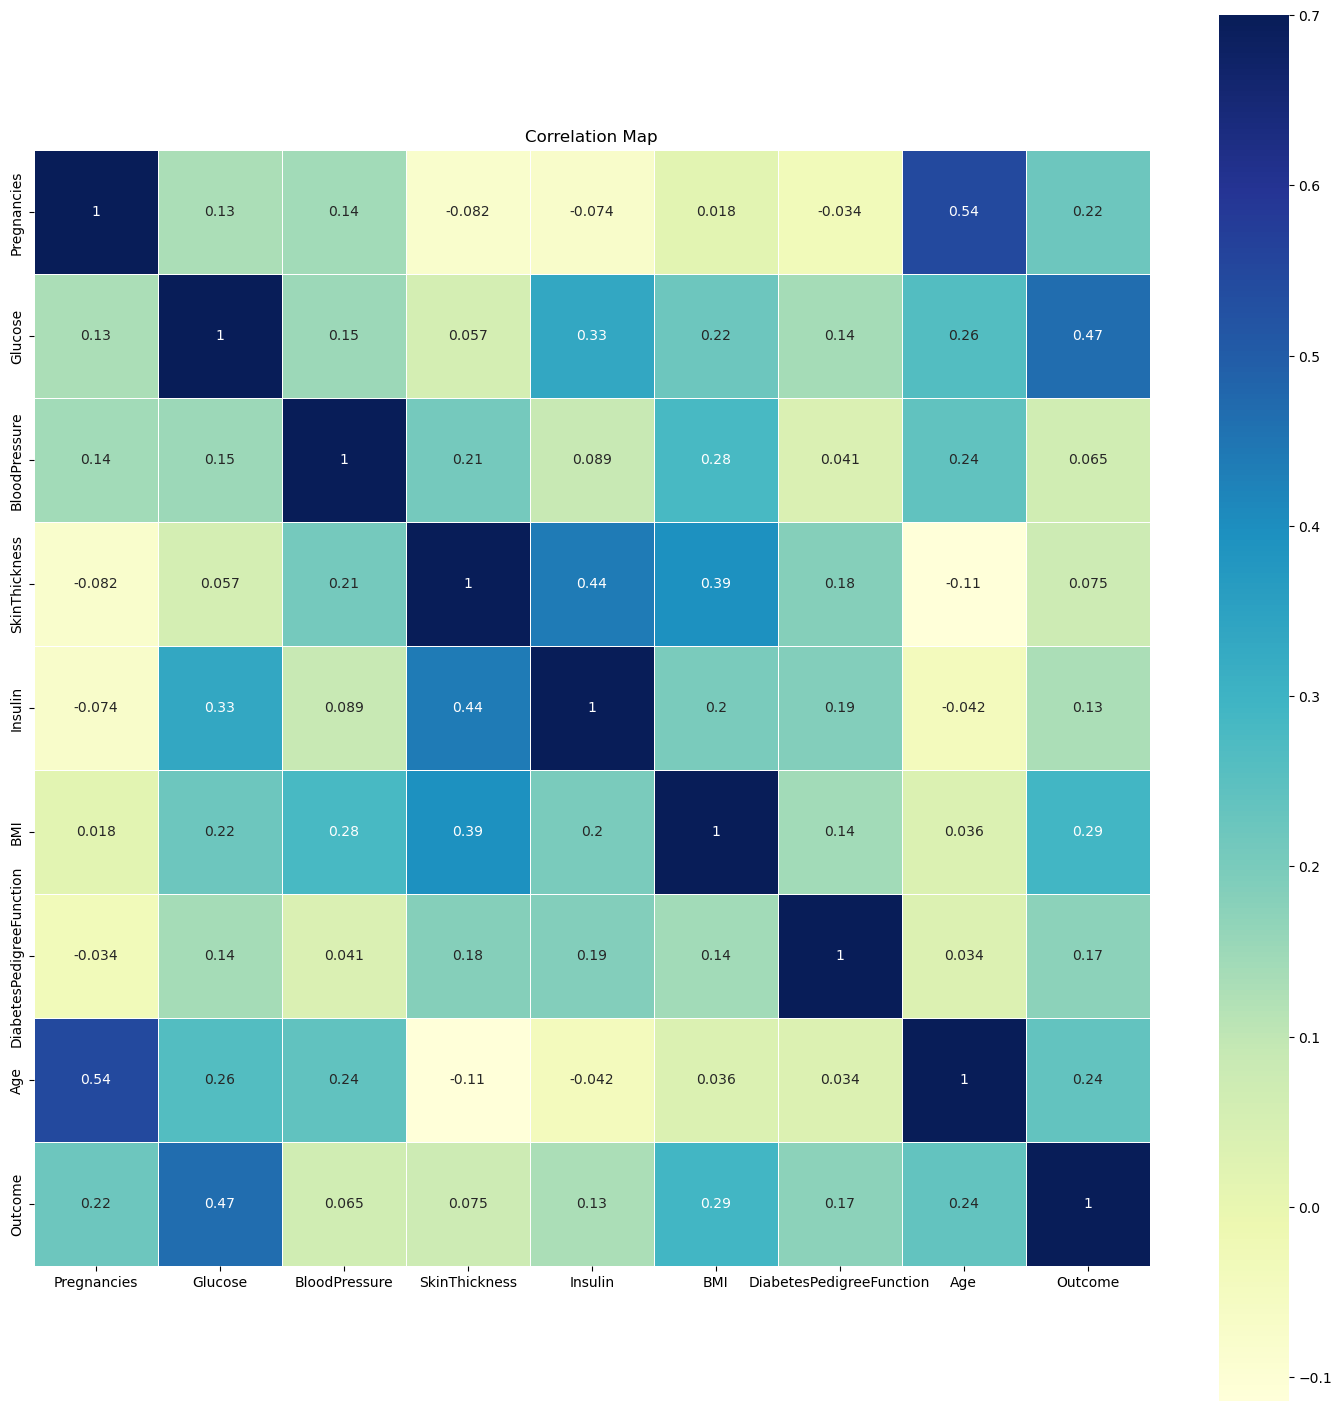

In [58]:
matrix=data.corr()
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(matrix,vmax=.7,square=True,cmap='YlGnBu',annot=True,linewidth=.5).set_title('Correlation Map');

## Checking for values which are 0

In [65]:
print('Total number of rows in the dataset:',len(data))
print('Total number of rows in the Glucose which are zero:',len(data.loc[data['Glucose']==0]))
print('Total number of rows in the Blood Pressure which are zero:',len(data.loc[data['BloodPressure']==0]))
print('Total number of rows in the Skin Thickness which are zero:',len(data.loc[data['SkinThickness']==0]))
print('Total number of rows in the Insulin which are zero:',len(data.loc[data['Insulin']==0]))
print('Total number of rows in the BMI which are zero:',len(data.loc[data['BMI']==0]))
print('Total number of rows in the DiabetesPedigreeFunction which are zero:',len(data.loc[data['DiabetesPedigreeFunction']==0]))
print('Total number of rows in the Age which are zero:',len(data.loc[data['Age']==0]))

Total number of rows in the dataset: 768
Total number of rows in the Glucose which are zero: 5
Total number of rows in the Blood Pressure which are zero: 35
Total number of rows in the Skin Thickness which are zero: 227
Total number of rows in the Insulin which are zero: 374
Total number of rows in the BMI which are zero: 11
Total number of rows in the DiabetesPedigreeFunction which are zero: 0
Total number of rows in the Age which are zero: 0


## Removing the 0 using mean stratergy

In [67]:
from sklearn.impute import SimpleImputer
fill=SimpleImputer(missing_values=0,strategy='mean')
x_train=fill.fit_transform(x_train)
x_test=fill.fit_transform(x_test)

## separating last column i.e outcomes from the dataset and assigning to different variables

In [102]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Not Diabetic




1 --> Diabetic

In [103]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [104]:
#separating data and labels
x=data.drop(columns='Outcome',axis=1)
y=data['Outcome']

In [109]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [108]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Standardisation

In [110]:
scaler=StandardScaler()

In [111]:
scaler.fit(x)

StandardScaler()

In [114]:
standardised_data=scaler.transform(x)

In [115]:
print(standardised_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [116]:
x=standardised_data
y=data['Outcome']

In [117]:
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## splitting data into train data and test data 

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3, stratify=y,random_state=2)

In [121]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (537, 8) (231, 8)


## Training the model

In [122]:
classifier = svm.SVC(kernel='linear')

In [123]:
#training the support vector Machine Classifier
classifier.fit(x_train,y_train)

SVC(kernel='linear')

## Module Evaluation

## Accuracy Score

In [124]:
# Accuracy score on the training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

## Accuracy score on train data

In [125]:
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.7821229050279329


In [126]:
# Accuracy score on the test data
x_test_prediction = classifier.predict(x_test)
training_data_accuracy=accuracy_score(x_test_prediction,y_test)

## Accuracy score on the test data

In [128]:
print('Accuracy score of the test data:',training_data_accuracy)

Accuracy score of the test data: 0.7748917748917749


## Making a predictive system

In [131]:
input_data=(1,103,30,38,83,43.3,0.183,33) #giving input from dataset and checking whether the prediction is right or wrong

input_data_as_numpy_array=np.asarray(input_data) #changing the input data to numpy array

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1) # reshaping the array as we are predicting only for one instance

std_data=scaler.transform(input_data_reshaped) # standardising the input data
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print('The person is NOT DIABETIC')
else:
    print('The person is DIABETIC')

[[-0.84488505 -0.56004775 -2.02166474  1.09545411  0.02778979  1.43512945
  -0.87244072 -0.0204964 ]]
[0]
The person is NOT DIABETIC
